# Objective: 

---


1. Predicting the labels using Decision tree classifier
2. Checking the impact of PCA on Decision tree classifier
3. Making clusters based on species using KMeans algorithm
4. Comparing predicted clusters against actual clusters of species

In [1]:
#importing necessary libraries/api
import numpy as np
import seaborn as sb
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
%config Inlinebackend.figure_format = 'retina'
from sklearn import datasets, decomposition
from mpl_toolkits.mplot3d import Axes3D
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
#loading dataset
iris = datasets.load_iris()
x = iris.data
y = iris.target

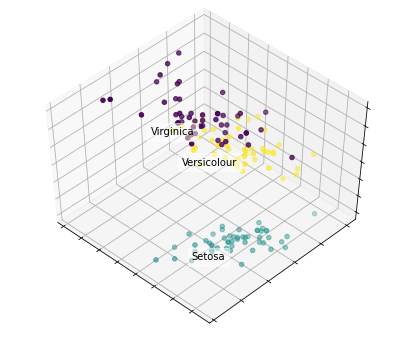

In [3]:
#ploting a 3d graph
fig = plt.figure(1, figsize=(6,5))
plt.clf()
ax = Axes3D(fig, rect=[0, 0, 0.9, 0.9], elev=50, azim=134)
plt.cla()
for name, label in [('Setosa', 0), ('Versicolour', 1), ('Virginica', 2)]:
    ax.text3D(x[y == label, 0].mean(),
              x[y == label, 1].mean() + 0.5,
              x[y == label, 2].mean(), name,
              horizontalalignment='center',
              bbox=dict(alpha=.5, edgecolor='w', facecolor='w'))
    
y_clr = np.choose(y, [1, 2, 0]).astype(np.float)
ax.scatter(x[:, 0], x[:, 1], x[:, 2], c=y_clr)

ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([]);

In [4]:
x_pd = pd.DataFrame(x, columns=iris.feature_names)
x_pd.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [5]:
# Train, test splits
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=.3, 
                                          stratify=y,  random_state=42)

In [6]:
# Decision trees with depth = 3
clf = DecisionTreeClassifier(max_depth=3, random_state=42)
clf.fit(X_train, y_train)
print('Accuracy ', clf.score(X_test, y_test))

Accuracy  0.9777777777777777


In [7]:
# Using PCA from sklearn PCA
pca = decomposition.PCA(n_components=2)
X_centered = x - x.mean(axis=0)
pca.fit(X_centered)
X_pca = pca.transform(X_centered)

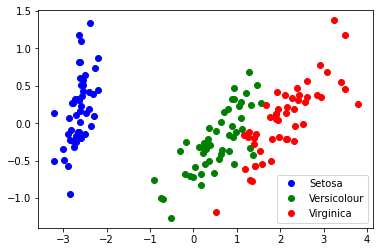

In [8]:
# Plotting the results of PCA
plt.plot(X_pca[y == 0, 0], X_pca[y == 0, 1], 'bo', label='Setosa')
plt.plot(X_pca[y == 1, 0], X_pca[y == 1, 1], 'go', label='Versicolour')
plt.plot(X_pca[y == 2, 0], X_pca[y == 2, 1], 'ro', label='Virginica')
plt.legend(loc=0)

In [9]:
# Test-train split after PCA
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=.3, 
                                        stratify=y, random_state=42)

In [10]:
# Decision trees with depth = 3 after pca
clf2 = DecisionTreeClassifier(max_depth=3, random_state=42, criterion='entropy')
clf2.fit(X_train, y_train)
print('Accuracy ', clf2.score(X_test, y_test))

Accuracy  0.9555555555555556


In [11]:
#finding optimal value of no. of clusters
ssd = []
for i in range(1,11):
  km = KMeans(n_clusters=i, init='k-means++', random_state=0)
  km.fit(x)
  ssd.append(km.inertia_)

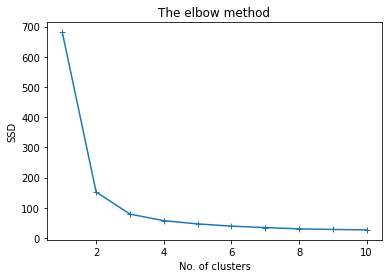

In [12]:
#elbow method
plt.plot(range(1,11), ssd, '+-')
plt.title('The elbow method')
plt.xlabel('No. of clusters')
plt.ylabel('SSD')
plt.show()

In [19]:
#using kmeans to do clustering
kmeans = KMeans(n_clusters=3, init='k-means++', random_state=0)
kmeans.fit(x)
pred = kmeans.labels_

In [20]:
#adding additional columns
x_pd['cluster'] = pred
x_pd['actual'] = y

In [21]:
#assignig correct label names
x_pd['cluster'].replace(1, 5, inplace=True)
x_pd['cluster'].replace(0, 6, inplace=True)
x_pd['cluster'].replace(2, 7, inplace=True)
x_pd['cluster'].replace(5, 0, inplace=True)
x_pd['cluster'].replace(6, 2, inplace=True)
x_pd['cluster'].replace(7, 1, inplace=True)
x_pd.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),cluster,actual
0,5.1,3.5,1.4,0.2,0,0
1,4.9,3.0,1.4,0.2,0,0
2,4.7,3.2,1.3,0.2,0,0
3,4.6,3.1,1.5,0.2,0,0
4,5.0,3.6,1.4,0.2,0,0


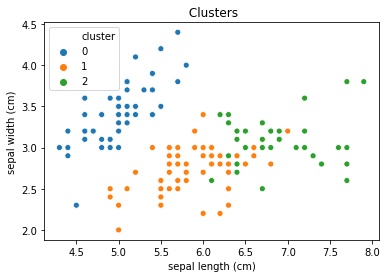

In [22]:
#plotting predicted clusters
sb.scatterplot(data=x_pd, x='sepal length (cm)', y='sepal width (cm)',  palette=sb.color_palette(n_colors=3), hue='cluster')
title = plt.title(' Clusters')
plt.show()

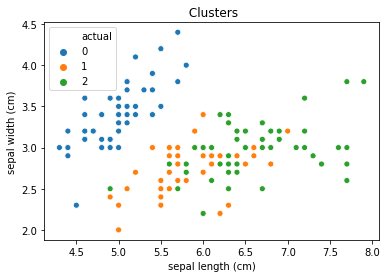

In [23]:
#plotting actual labels
sb.scatterplot(data=x_pd, x='sepal length (cm)', y='sepal width (cm)', palette=sb.color_palette(n_colors=3), hue='actual')
title = plt.title(' Clusters')
plt.show()

In [24]:
acc = accuracy_score(x_pd['actual'], x_pd['cluster'])
print(acc)

0.8933333333333333
